In [233]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

In [234]:
'''
Encontrar la configuración que adopta un sistema de N=50 partículas que interacutan con un potencial de lennar Jonnes. 
Use el algoritmo genético para minimizar la energía total del sistema: Use la siguiente definición de potencial y de energía: 
(Estos no son métodos de clase , Cuidado!)
'''
def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, epsilon=1, sigma=1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy

In [235]:
class Robot:

    def __init__(self, f, Id, num_particles = 50, rate=0.01):

        self.Id = Id
        # Mutation Rate
        self.rate = rate
        self.Fitness = np.inf

        # Funcion a minimizar
        self.f = f

        # Espacio de parámetros
        self.r = np.random.uniform(-5, 5, size=(num_particles, 3))

    def Mutate(self):

        self.r += np.random.normal(0, self.rate, size=self.r.shape)

    def GetR(self):
        return self.r

    def SetFitness(self):
        self.Fitness = self.f(self.r)

        # Fine tunning
        if self.Fitness < 0.05:
            self.rate = 0.005


    def GetFitness(self):
        return self.Fitness

In [236]:
def GetRobots(N):

    Robots = []

    for i in range(N):
        r = Robot(f=TotalEnergy,Id=i)
        Robots.append(r)

    return Robots

In [237]:

def Plotter(e):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    ax.set_title('Epoch={:.0f}'.format(e))

    return ax


def Genetic(Robots, epochs = 200):


    # Guardamos los mas aptos
    N = int(0.5*len(Robots))

    # Mirar la aptitud más pequeña en cada epoca
    Fitness = np.array([])
    
    for e in range(int(epochs)):

        # actualizamos informaicíón
        for i,p in enumerate(Robots):
            
            p.Mutate()
            p.SetFitness()

        #clear_output(wait=True)


        # Ordenamos los robots por fitness
        scores = [ (p.Fitness, p) for p in Robots ]
        scores.sort(key = lambda x: x[0], reverse = False) # De menor a mayor

        # Tomamos lo incides hasta el % porciento
        Temp = [r[1] for i,r in enumerate(scores) if i < N ]

        for i in range(int(0.1 * len(Robots))):  # Un 10% de los robots se reintroducen aleatoriamente
            Robots[i] = Robot(TotalEnergy, i)
        
        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])


        # Miramos el fitness de cada robot
        Fitness_ = [ r.GetFitness() for i,r in enumerate(Robots) ]

        # Guardamos la aptitud promedio
        Fitness = np.append(Fitness,np.mean(Fitness_))

        #ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(-0.2,0.9),frameon=False,fontsize=10)
        if e % 10 == 0:
            clear_output(wait=True)
            # Imagen para pintar
            ax = Plotter(e)

            # Funcion de Fitness
            ax.plot(Fitness,color='k')
            ax.set_xlabel('Epoch')
            ax.legend(loc=1)

            plt.show()
    return Fitness[-1]
     

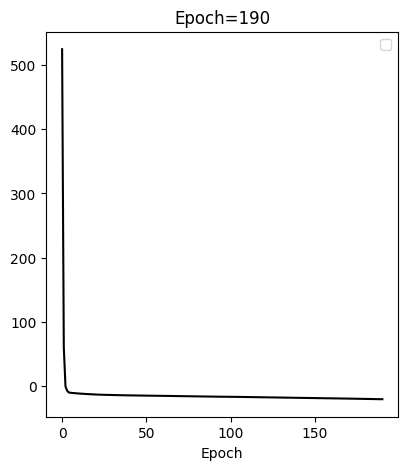

np.float64(-21.555937177867076)

In [238]:
Robots = GetRobots(50)
Genetic(Robots)